In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/mini_project/Combined_Menstrual_Habits_Comparison.csv'
data = pd.read_csv(dataset_path)


In [7]:
# Encode categorical variables
categorical_cols = ["Dietary_Pattern", "Socioeconomic_Status", "Environmental_Factors",
                    "Region", "Industrialization_Level", "Nutrition_Access"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Create binary target: Early (<=12 years) vs Late (>12 years)
data['Menstrual_Class'] = (data['Menstrual_Onset_Age'] <= 12).astype(int)


In [8]:
# Separate features and target
X = data.drop(columns=["Menstrual_Onset_Age", "Generation", "Menstrual_Class"])
y = data["Menstrual_Class"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Models for evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "MLP Classifier": MLPClassifier(max_iter=500, random_state=42)
}

metrics = []


Training and Evaluating: Logistic Regression

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.64      0.90      0.75       142
           1       0.66      0.28      0.39        98

    accuracy                           0.65       240
   macro avg       0.65      0.59      0.57       240
weighted avg       0.65      0.65      0.60       240



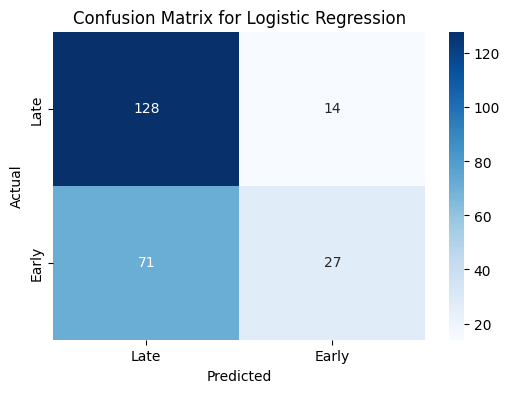

Training and Evaluating: Random Forest

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.64      0.87      0.74       142
           1       0.61      0.29      0.39        98

    accuracy                           0.63       240
   macro avg       0.62      0.58      0.56       240
weighted avg       0.63      0.63      0.60       240



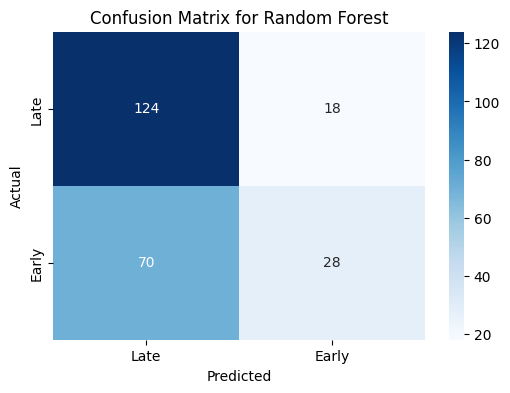

Training and Evaluating: Gradient Boosting

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.62      0.79      0.70       142
           1       0.50      0.31      0.38        98

    accuracy                           0.59       240
   macro avg       0.56      0.55      0.54       240
weighted avg       0.57      0.59      0.57       240



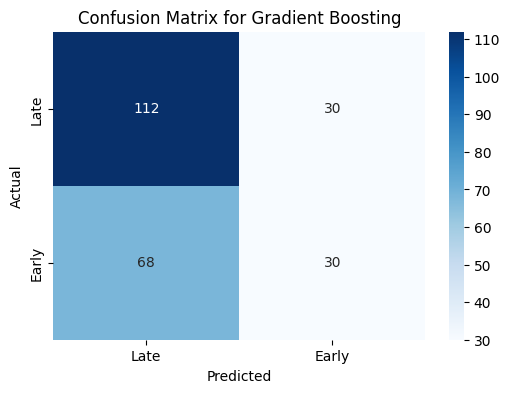

Training and Evaluating: SVM

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.63      0.92      0.75       142
           1       0.65      0.22      0.33        98

    accuracy                           0.63       240
   macro avg       0.64      0.57      0.54       240
weighted avg       0.64      0.63      0.58       240



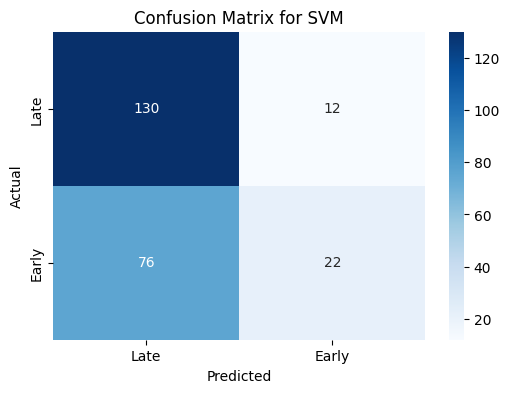

Training and Evaluating: KNN

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.62      0.72      0.66       142
           1       0.47      0.36      0.40        98

    accuracy                           0.57       240
   macro avg       0.54      0.54      0.53       240
weighted avg       0.56      0.57      0.56       240



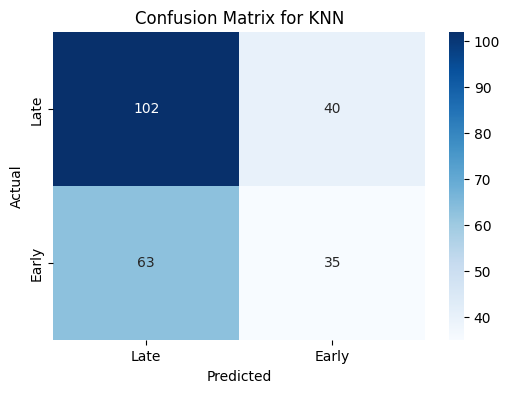

Training and Evaluating: Naive Bayes

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       142
           1       0.62      0.36      0.45        98

    accuracy                           0.65       240
   macro avg       0.64      0.60      0.60       240
weighted avg       0.64      0.65      0.62       240



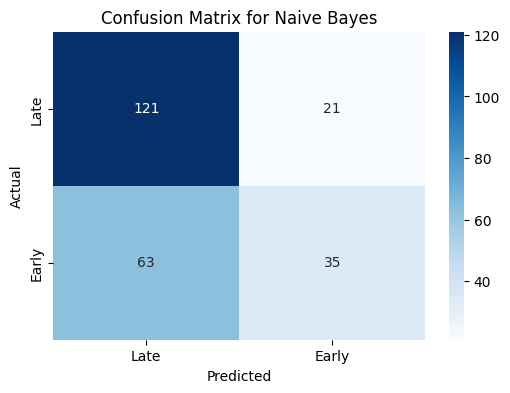

Training and Evaluating: XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:29:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.62      0.74      0.67       142
           1       0.47      0.34      0.39        98

    accuracy                           0.57       240
   macro avg       0.54      0.54      0.53       240
weighted avg       0.56      0.57      0.56       240



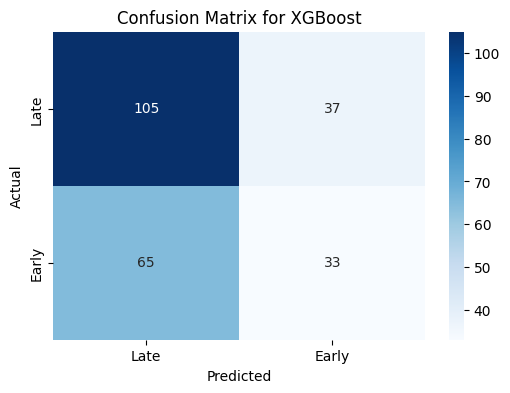

Training and Evaluating: MLP Classifier


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



Classification Report for MLP Classifier:

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       142
           1       0.39      0.27      0.32        98

    accuracy                           0.53       240
   macro avg       0.49      0.49      0.48       240
weighted avg       0.51      0.53      0.51       240



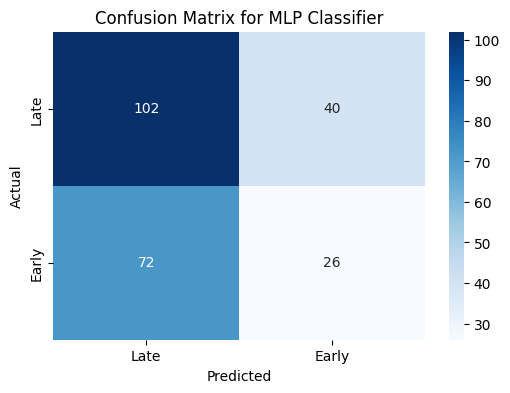

In [10]:
for model_name, model in models.items():
    print(f"Training and Evaluating: {model_name}")
    # Train the model
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test)
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    # Store metrics
    metrics.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Cohen's Kappa": kappa
    })
    # Display classification report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Late", "Early"], yticklabels=["Late", "Early"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



Model Evaluation Metrics:
                 Model  Accuracy  Precision    Recall  F1 Score  Cohen's Kappa
5          Naive Bayes  0.650000   0.625000  0.357143  0.454545       0.224138
4                  KNN  0.570833   0.466667  0.357143  0.404624       0.078300
6              XGBoost  0.575000   0.471429  0.336735  0.392857       0.079699
1        Random Forest  0.633333   0.608696  0.285714  0.388889       0.173191
0  Logistic Regression  0.645833   0.658537  0.275510  0.388489       0.194440
2    Gradient Boosting  0.591667   0.500000  0.306122  0.379747       0.100917
3                  SVM  0.633333   0.647059  0.224490  0.333333       0.155740
7       MLP Classifier  0.533333   0.393939  0.265306  0.317073      -0.017257


<Figure size 1200x800 with 0 Axes>

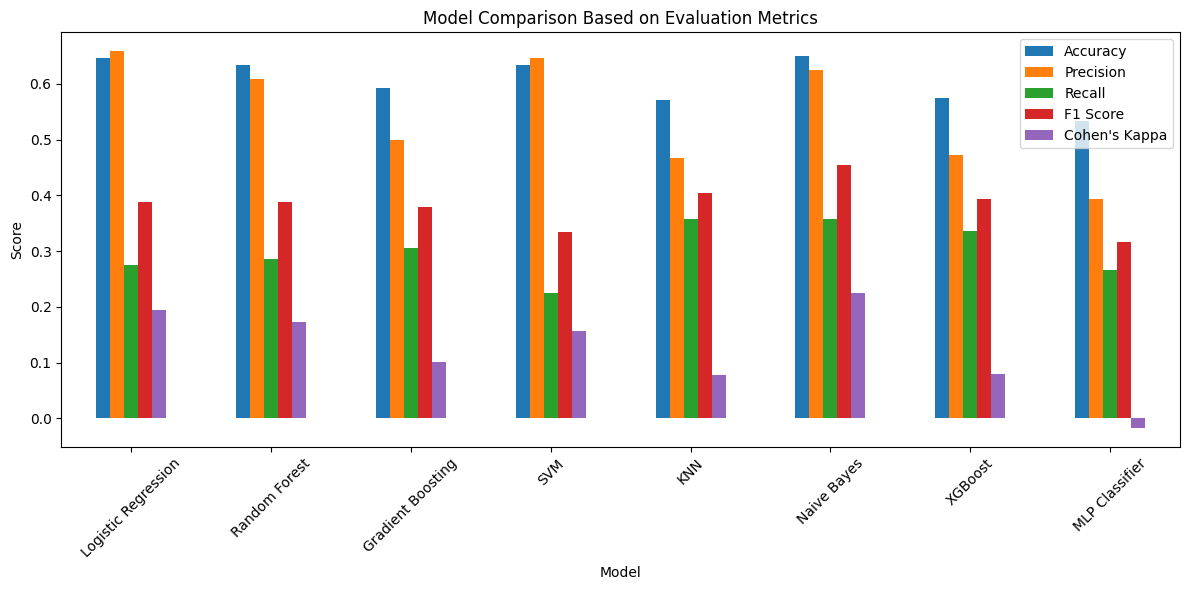

In [11]:
# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display metrics
print("\nModel Evaluation Metrics:")
print(metrics_df.sort_values(by="F1 Score", ascending=False))

# Visualize Metrics
plt.figure(figsize=(12, 8))
metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6))
plt.title("Model Comparison Based on Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# Train and Save Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

import pickle

# Save the model
model_path = '/content/drive/MyDrive/mini_project/naive_bayes_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Naive Bayes model saved to {model_path}")


Naive Bayes model saved to /content/drive/MyDrive/mini_project/naive_bayes_model.pkl
